## **Linear Regression - Exercises**
*Ngày 28 tháng 9 năm 2024*

### **Exercise 1: Reading and Processing Data**

In [1]:
# dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
def get_column(data, index):
    return [row[index] for row in data]

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input  and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X,y

In [3]:
#Multiple choices:
#Question 1:
X,y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.1, 300.5, 78.9]


### **Exercise 2: Training Linear Regression with One Sample**

#### *2.1 Parameter Initialization*

In [4]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b  = 0

    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

#### *2.2 Prediction Function*

In [5]:
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

In [6]:
#Multiple choices:
#Question 2:
y_p = predict(x1 = 1, x2 =1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_p)

1.0


#### *2.3 Loss Function*

In [7]:
def compute_loss_mse(y_hat, y):
    return (y_hat - y)**2
def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

In [8]:
#Multiple choices:
#Question 3:
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


#### *2.4 Gradient Computation*

In [9]:
def compute_gradient_wi(xi, y, y_hat):
    return 2 * (y_hat - y) * xi

def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)

In [10]:
#Multiple choices:
#Question 4:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [11]:
#Multiple choices:
#Question 5:
g_b =  compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


#### *2.5 Weight Update Function*

In [12]:
def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr * dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr * dl_db

In [13]:
#Multiple choices:
#Question 6:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr = 1e-5)
print(after_wi)

1.000005


In [14]:
#Multiple choices:
#Question 7:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5)
print(after_b)

0.50001


#### *2.6 Training and Plotting MSE*

In [15]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y_data)
  for epoch in range(epoch_max):
      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)

          # compute loss
          loss = compute_loss_mse(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

          # update parameters
          w1 = update_weight_wi(w1, dl_dw1, lr)
          w2 = update_weight_wi(w2, dl_dw2, lr)
          w3 = update_weight_wi(w3, dl_dw3, lr)
          b  = update_weight_b(b, dl_db, lr)

          # logging
          losses.append(loss)
  return (w1, w2, w3, b, losses)

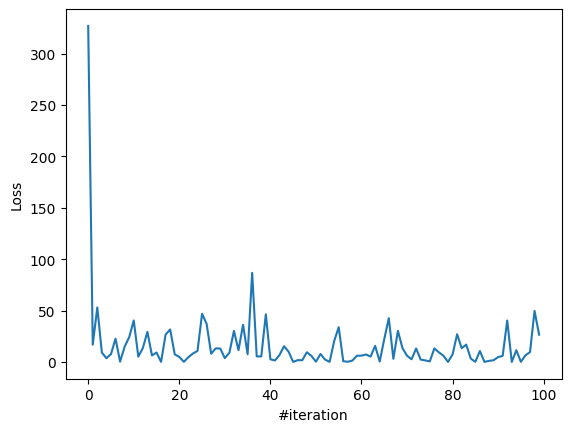

In [16]:
(w1, w2, w3, b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [17]:
#Multiple choices:
#Question 8:
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [18]:
#Multiple choices:
#Question 9:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'Predicted sales is: {sales}')

Predicted sales is: 8.176413319549823


#### *2.7 Training and Plotting MAE*

In [19]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y_data)
  for epoch in range(epoch_max):
      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)

          # compute loss
          loss = compute_loss_mae(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

          # update parameters
          w1 = update_weight_wi(w1, dl_dw1, lr)
          w2 = update_weight_wi(w2, dl_dw2, lr)
          w3 = update_weight_wi(w3, dl_dw3, lr)
          b  = update_weight_b(b, dl_db, lr)

          # logging
          losses.append(loss)
  return (w1, w2, w3, b, losses)

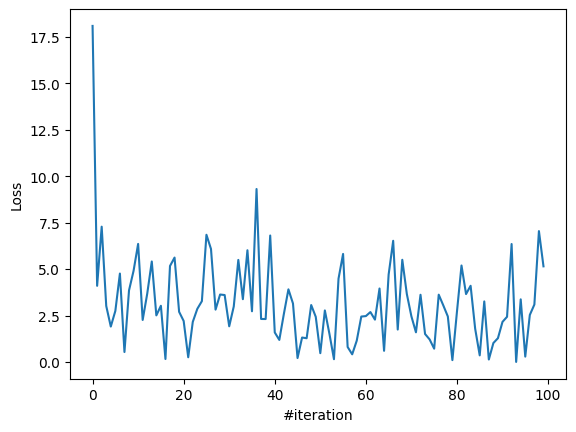

In [20]:
(w1, w2, w3, b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [21]:
#Multiple choices:
#Question 10:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


### **Exercise 3: Training Linear Regression with N Samples**

#### *Plotting MSE*

In [22]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 50,lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()
  N = len(y_data)

  for epoch in range(epoch_max):

      loss_total = 0.0
      dw1_total = 0.0
      dw2_total = 0.0
      dw3_total = 0.0
      db_total  = 0.0

      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)

          # compute loss
          loss = compute_loss_mse(y, y_hat)

          # accumulate loss to total loss
          loss_total += loss

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

      # accumulate gradient w1, w2, w3, b
      dw1_total += dl_dw1
      dw2_total += dl_dw2
      dw3_total += dl_dw3
      db_total  += dl_db

      # (after processing N samples) - update parameters
      w1 = update_weight_wi(w1, dw1_total/N, lr)
      w2 = update_weight_wi(w2, dw2_total/N, lr)
      w3 = update_weight_wi(w3, dw3_total/N, lr)
      b  = update_weight_b(b, db_total/N, lr)

      # logging
      losses.append(loss_total/N)
  return (w1,w2,w3,b, losses)

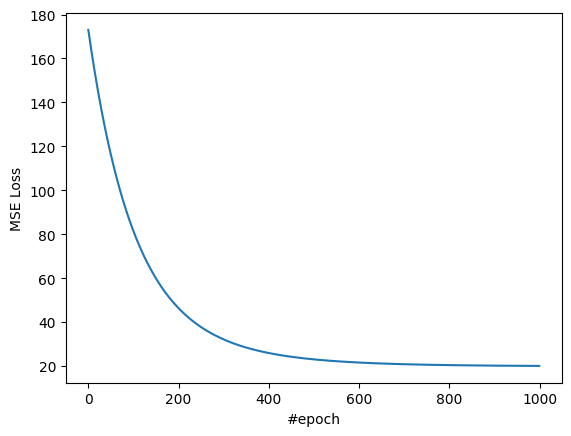

In [23]:
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

In [24]:
#Multiple choices:
#Question 11:
print(w1,w2,w3)

0.07865211655017688 0.009363049405216773 3.387579445815582e-06


#### *Plotting MAE (Optional)*

In [25]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 50,lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()
  N = len(y_data)

  for epoch in range(epoch_max):

      loss_total = 0.0
      dw1_total = 0.0
      dw2_total = 0.0
      dw3_total = 0.0
      db_total  = 0.0

      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)

          # compute loss
          loss = compute_loss_mae(y, y_hat)

          # accumulate loss to total loss
          loss_total += loss

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

      # accumulate gradient w1, w2, w3, b
      dw1_total += dl_dw1
      dw2_total += dl_dw2
      dw3_total += dl_dw3
      db_total  += dl_db

      # (after processing N samples) - update parameters
      w1 = update_weight_wi(w1, dw1_total/N, lr)
      w2 = update_weight_wi(w2, dw2_total/N, lr)
      w3 = update_weight_wi(w3, dw3_total/N, lr)
      b  = update_weight_b(b, db_total/N, lr)

      # logging
      losses.append(loss_total/N)
  return (w1,w2,w3,b, losses)

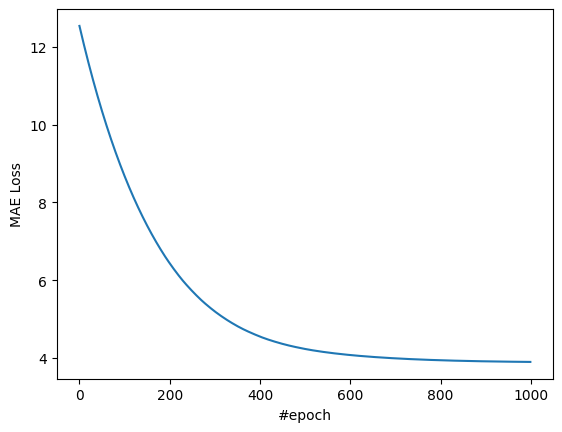

In [26]:
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

### **Exercise 4: Improved Linear Regression**

In [27]:
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # building X input  and y output for training
  #Create list of features for input
  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data
  return X,y

In [28]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    return [0, 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344]
    # return [bias, w1, w2, w3]

In [29]:
def predict(X_features, weights):
    return sum(x * w for x, w in zip(X_features, weights))

def compute_gradient_w(X_features, y, y_hat):
    return [2 * (y_hat - y) * x for x in X_features]

def update_weight(weights, dl_dweights, lr):
    return [w - lr * dw for w, dw in zip(weights, dl_dweights)]

In [30]:
def implement_linear_regression(X_feature, y_output, epoch_max = 50,lr = 1e-5):

  losses = []
  weights = initialize_params()
  N = len(y_output)
  for epoch in range(epoch_max):
      for i in range(N):
          # get a sample - row i
          features_i = X_feature[i]
          y = y_output[i]

          # compute output
          y_hat = predict(features_i, weights)

          # compute loss
          loss = compute_loss_mse(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dweights = compute_gradient_w(features_i, y, y_hat)

          # update parameters
          weights = update_weight(weights, dl_dweights, lr)

          # logging
          losses.append(loss)
  return weights, losses

#### *Plotting Results*

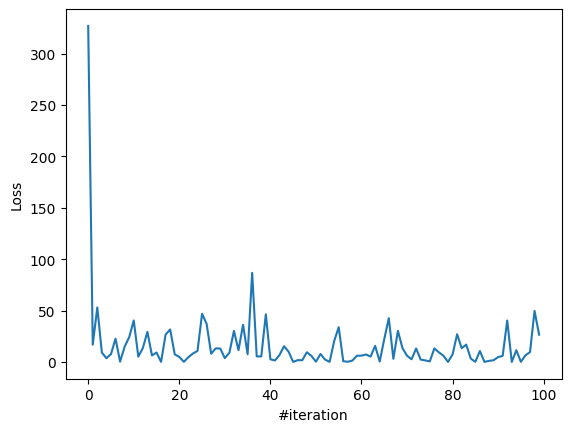

In [31]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [32]:
#Multiple choices:
#Question 12:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
# Print loss value at interation 9999
print(L[9999])

31.338878034644356
